## Lasso and Ridge Regression 

There are two major problems one can encounter: overfitting and underfitting.
Overfitting happens when the model performs well on the training set but not so well on unseen (test) data.
Underfitting happens when it neither performs well on the train set nor on the test set.
Regularization is implemented to avoid overfitting of the data.

- Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. Lasso regression takes the magnitude of the coefficients, ridge regression takes the square.
- Lasso regression can be used for automatic feature selection, as the geometry of its constrained region allows coefficient values to become zero.

In [1]:
from sklearn.datasets import load_boston

import numpy as np
import pandas as pd

In [2]:
df=load_boston()

In [5]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
data=pd.DataFrame(df.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
data.columns=df.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df.target.shape

(506,)

In [14]:
data['Price']=df.target

In [16]:
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
#linear reg

X=data.iloc[:,:-1]
y=data.iloc[:,-1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
mse=cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-23.724300740994828


In [45]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha': [0.01,.02,.05,.1,.5,1,2,5,10,25,50,75,100]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 5, 10, 25,
                                   50, 75, 100]},
             scoring='neg_mean_squared_error')

In [46]:
print(ridge_reg.best_score_)
print(ridge_reg.best_params_)
print(ridge_reg.best_index_)

-29.905701947540376
{'alpha': 100}
12


In [47]:

lasso=Lasso()
parameters={'alpha': [0.01,.02,.05,.1,.5,1,2,5,10,25,50,75,100]}
lasso_reg=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 5, 10, 25,
                                   50, 75, 100]},
             scoring='neg_mean_squared_error')

In [49]:
print(lasso_reg.best_score_)
print(lasso_reg.best_params_)
print(lasso_reg.best_index_)

-34.63412434342714
{'alpha': 0.5}
4


In [52]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=.2,random_state=0)

In [51]:
pred_ridge=ridge_reg.predict(X_test)
pred_lasso=lasso_reg.predict(X_test)

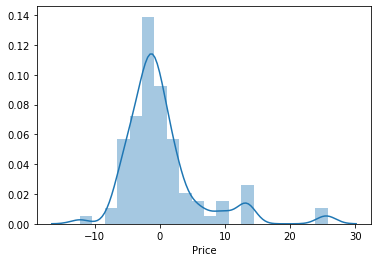

In [58]:
import seaborn as sns
sns.distplot(y_test-pred_lasso)


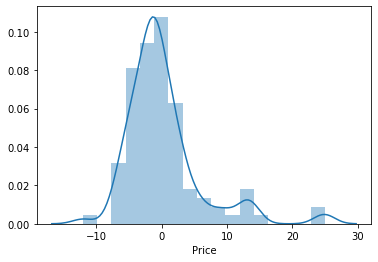

In [59]:
sns.distplot(y_test-pred_ridge)